# Forecasting beer sales 

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split

In [2]:
DATASET_NAME = 'off-trade_cz' # all_cz, off-trade_cz, on-trade_cz

DATA_PATH = f'./data/{DATASET_NAME}_data.csv'

MODEL_PATH = f'./models/{DATASET_NAME}_model.joblib'

RESULT_CSV_PATH = f'./results/{DATASET_NAME}_result.csv'
RESULT_EXCEL_PATH = f'./results/{DATASET_NAME}_result.xlsx'

In [3]:
data = pd.read_csv(DATA_PATH, header=0, decimal=",")

data.head()

,SkuShort,ProductGroup,PrimaryPack,Country,Year,Week,NumberWorkdays,AvgTemp,AvgRain,AvgSun,IsLockdown,PdtHl,PrevWeekPdtHl1,BgtHl,PrevWeekBgtHl1,SalesHl,PrevWeekSalesHl1,PrevWeekSalesHl2,OldPredSalesHl
0,1015,CLEAR BEER,RB,CZ,2016,1,5,-1.164286,0.935714,1.014286,0,NaN,NaN,1637.344974,NaN,1805.0000,NaN,NaN,705.4995
1,1016,CLEAR BEER,RB,CZ,2016,1,5,-1.164286,0.935714,1.014286,0,NaN,NaN,293.344724,NaN,159.1128,NaN,NaN,160.0957
2,1022,CLEAR BEER,RB,CZ,2016,1,5,-1.164286,0.935714,1.014286,0,NaN,NaN,59.144115,NaN,72.4900,NaN,NaN,74.4420
3,1026,CLEAR BEER,RB,CZ,2016,1,5,-1.164286,0.935714,1.014286,0,NaN,NaN,10.669629,NaN,23.8392,NaN,NaN,8.8567
4,1027,CLEAR BEER,RB,CZ,2016,1,5,-1.164286,0.935714,1.014286,0,NaN,NaN,2.109411,NaN,3.9600,NaN,NaN,4.9003


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25967 entries, 0 to 25966
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SkuShort          25967 non-null  int64  
 1   ProductGroup      25967 non-null  object 
 2   PrimaryPack       25967 non-null  object 
 3   Country           25967 non-null  object 
 4   Year              25967 non-null  int64  
 5   Week              25967 non-null  int64  
 6   NumberWorkdays    25967 non-null  int64  
 7   AvgTemp           25967 non-null  float64
 8   AvgRain           25967 non-null  float64
 9   AvgSun            25967 non-null  float64
 10  IsLockdown        25967 non-null  int64  
 11  PdtHl             16704 non-null  float64
 12  PrevWeekPdtHl1    16429 non-null  float64
 13  BgtHl             20994 non-null  float64
 14  PrevWeekBgtHl1    20492 non-null  float64
 15  SalesHl           25967 non-null  float64
 16  PrevWeekSalesHl1  25229 non-null  float6

In [5]:
cols_drop = ['SkuShort', 'ProductGroup', 'PrimaryPack', 'Country', 'Year', 'SalesHl', 'OldPredSalesHl'] #'SkuShort', 'ProductGroup', 'PrimaryPack',

y = pd.DataFrame(data.SalesHl).round(0).astype(int)
X = data.drop(cols_drop, axis=1).fillna(0)

X.IsLockdown = X.IsLockdown.astype('bool')
# X.SkuShort = X.SkuShort.astype('category')
# X.ProductGroup = X.SkuShort.astype('category')
# X.PrimaryPack = X.SkuShort.astype('category')

# X.PrevWeekSalesHl1 = X.PrevWeekSalesHl1.round(0).astype(int)
# X.PrevWeekSalesHl2 = X.PrevWeekSalesHl2.round(0).astype(int)
# X.BgtHl = X.BgtHl.round(0).astype(int)
# X.PdtHl = X.PdtHl.round(0).astype(int)


y_oldPred = pd.DataFrame(data.OldPredSalesHl).fillna(0).round(0).astype(int)

#y.head()
X.head()

,Week,NumberWorkdays,AvgTemp,AvgRain,AvgSun,IsLockdown,PdtHl,PrevWeekPdtHl1,BgtHl,PrevWeekBgtHl1,PrevWeekSalesHl1,PrevWeekSalesHl2
0,1,5,-1.164286,0.935714,1.014286,False,0.0,0.0,1637.344974,0.0,0.0,0.0
1,1,5,-1.164286,0.935714,1.014286,False,0.0,0.0,293.344724,0.0,0.0,0.0
2,1,5,-1.164286,0.935714,1.014286,False,0.0,0.0,59.144115,0.0,0.0,0.0
3,1,5,-1.164286,0.935714,1.014286,False,0.0,0.0,10.669629,0.0,0.0,0.0
4,1,5,-1.164286,0.935714,1.014286,False,0.0,0.0,2.109411,0.0,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Week,NumberWorkdays,AvgTemp,AvgRain,AvgSun,IsLockdown,PdtHl,PrevWeekPdtHl1,BgtHl,PrevWeekBgtHl1,PrevWeekSalesHl1,PrevWeekSalesHl2
25895,53,4,0.998077,1.003846,3.332692,True,57.142857,0.000000,365.596415,365.596415,343.2000,391.3200
5478,10,5,4.557143,1.578571,2.257143,False,0.000000,0.000000,147.902989,147.902989,49.2624,70.2504
22120,18,4,13.121429,1.757143,6.200000,True,79.374040,115.333333,38.106780,23.915262,43.6800,193.4400
21455,12,5,7.050000,1.457143,5.728571,True,1347.157204,329.667277,1075.938372,1075.938372,812.6400,756.4800
13638,39,4,9.835714,0.192857,7.628571,False,0.000000,0.000000,86.740089,86.740089,89.3200,115.6800


In [7]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_percentage_error

from sklearn import ensemble, gaussian_process, isotonic, kernel_ridge, linear_model, neighbors, neural_network, svm, tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Create linear regression object

# model = ensemble.AdaBoostRegressor
# model = ensemble.BaggingRegressor
# model = ensemble.ExtraTreesRegressor
# model = ensemble.GradientBoostingRegressor
# model = ensemble.RandomForestRegressor
# model = ensemble.StackingRegressor
# model = ensemble.VotingRegressor
# model = ensemble.HistGradientBoostingRegressor

# model = gaussian_process.GaussianProcessRegressor
# model = isotonic.IsotonicRegression

#NOT model = kernel_ridge.KernelRidge(alpha=1.0)# ON-TRADE: ,OFF-TRADE: 0.7827

# #option CV
# model = linear_model.LogisticRegression
# model = linear_model.LinearRegression
# model = linear_model.Ridge
# model = linear_model.SGDRegressor
# model = linear_model.ElasticNet
# model = linear_model.Lars
# model = linear_model.LassoLars
# model = linear_model.OrthogonalMatchingPursuit
# model = linear_model.ARDRegression
# model = linear_model.BayesianRidge


# model = linear_model.MultiTaskElasticNet
# model = linear_model.MultiTaskLasso

# model = linear_model.HuberRegressor
# model = linear_model.RANSACRegressor
# model = linear_model.TheilSenRegressor

# model = linear_model.PoissonRegressor
# model = linear_model.TweedieRegressor
# model = linear_model.GammaRegressor
#NOT model = linear_model.PassiveAggressiveRegressor(random_state=0, fit_intercept=True)# ON-TRADE: ,OFF-TRADE: 0.6938

#model = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform', leaf_size=30, n_jobs=-1)# ON-TRADE: ,OFF-TRADE: 0.7941
#NOT model = neighbors.RadiusNeighborsRegressor(radius=5.0, weights='distance')

#model = neural_network.MLPRegressor(random_state=1, hidden_layer_sizes=50, max_iter=500, activation='relu', solver='adam', early_stopping=False)# ON-TRADE: ,OFF-TRADE: 0.8059

#NOT model = svm.LinearSVR()# ON-TRADE: ,OFF-TRADE: 0.7049
model = svm.NuSVR()
# model = svm.SVR

#NOT model = tree.DecisionTreeRegressor(random_state=0, criterion='mse', splitter='best')# ON-TRADE: ,OFF-TRADE: 0.6460
#NOT model = tree.ExtraTreeRegressor(random_state=0)# ON-TRADE: ,OFF-TRADE: 0.5968


distributions = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], gamma=['scale', 'auto'])
clf = GridSearchCV(model, distributions) #, random_state=0
search = clf.fit(X_train, y_train.values.ravel())
print(search.cv_results_)
print(search.best_score_)
print(search.best_params_)



# #BEST 
# #ON-TRADE: 0.9745, 5636.8731
# #OFF-TRADE: 0.8045, 14567.9493, without sku: (0.7934, 14149.3662)
# #model = ensemble.HistGradientBoostingRegressor(random_state=1, loss='least_squares', learning_rate=0.05, max_iter=350, max_leaf_nodes=70, early_stopping=False)

# # Train the model using the training sets
# model.fit(X_train, y_train)

# # Make predictions using the testing set
# y_pred = model.predict(X_test)
# y_pred[y_pred < 0] = 0

# # # The mean squared error
# # print('Mean squared error: %.4f'% mean_squared_error(y_test, y_pred))

# print(DATASET_NAME)
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.4f'% r2_score(y_test, y_pred))

# # #Best possible score is 1.0, lower values are worse.
# # print('Explained variance regression: %.4f'% explained_variance_score(y_test, y_pred))

# #max_error metric calculates the maximum residual error.
# print('Maximum residual error: %.4f'% max_error(y_test, y_pred))

# # #Mean absolute percentage error regression loss.
# # print('Mean absolute percentage error regression loss: %.4f'% mean_absolute_percentage_error(y_test, y_pred))

# print('Old Coefficient of determination: %.4f'% r2_score(y, y_oldPred))
# print('Old Maximum residual error: %.4f'% max_error(y, y_oldPred))

# # print(f'The number of iterations as selected by early stopping: {model.n_iter_}')
# # print(f'The scores at each iteration on the training data: {model.train_score_}')
# # print(f'The scores at each iteration on the held-out validation data: {model.validation_score_}')
# # print(f'Boolean mask for the categorical features: {model.is_categorical_}')



## Model analysis

In [269]:
# from skater.core.explanations import Interpretation
# from skater.model import InMemoryModel

# feature_names = X_train.columns.tolist()
# X_train_numpy = X_train[:500].to_numpy()

# # wrap our base model with InMemoryModel instance
# annotated_model = InMemoryModel(
#     model.predict, 
#     examples = X_train_numpy, 
#     model_type = 'regressor'
# )

# interpreter = Interpretation(X_train_numpy, feature_names=feature_names)


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

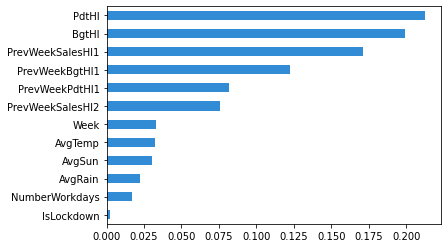

In [270]:
interpreter.feature_importance.plot_feature_importance(annotated_model, progressbar=False)

In [271]:
# interpreter.partial_dependence.plot_partial_dependence(
#     feature_names, annotated_model, grid_resolution=20, progressbar=False
# )

In [272]:
# from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

# # create an explainer
# explainer = LimeTabularExplainer(X_train_numpy, feature_names=feature_names, mode="regression")

# # explain something
# explanation = explainer.explain_instance(X_train_numpy[5], annotated_model)

# # show the explanation
# explanation.show_in_notebook()

In [273]:
# import shap
# #shap.initjs()

# X100 = shap.utils.sample(X, 100)

# explainer = shap.Explainer(model)
# shap_values = explainer(X100)

# shap.plots.waterfall(shap_values[0])

In [274]:
# shap.plots.force(shap_values[0])

In [275]:
# shap.plots.force(shap_values)

In [276]:
# shap.plots.scatter(shap_values, color=shap_values)

In [277]:
# shap.plots.bar(shap_values)

In [278]:
# shap.plots.beeswarm(shap_values)

## Save Result

In [279]:
result = X_test.copy(deep=False)
result["RealSalesHl"] = y_test.copy(deep=False)
result["PredictSalesHl"] = y_pred

dir_path = os.path.dirname(RESULT_CSV_PATH)
if (not os.path.isdir(dir_path)):
    os.mkdir(dir_path)
 
result.to_csv(RESULT_CSV_PATH, index=False)
result.to_excel(RESULT_EXCEL_PATH, index=False)

## Save model

In [280]:
import joblib

dir_path = os.path.dirname(MODEL_PATH)
if (not os.path.isdir(dir_path)):
    os.mkdir(dir_path)

joblib.dump(model, MODEL_PATH, compress=True)

['./models/off-trade_cz_model.joblib']

## Use model

In [281]:
# import joblib
# import os
# import numpy as np

# file = open(MODEL_PATH, 'rb')

# model = joblib.load(file)

# SkuShort = 2605
# Week = 23
# NumberWorkdays = 5
# AvgTemp = 15.892857142857142
# AvgRain = 3.5000000000000004
# AvgSun = 6.735714285714286
# IsLockdown = 0
# PdtHl = -1.0
# PrevWeekPdtHl1 = -1.0
# BgtHl = 6665
# PrevWeekBgtHl1 = 6665.949490847161
# PrevWeekSalesHl1 = 5020
# PrevWeekSalesHl2 = 5038
# SalesHl = 5386.5

# x = np.array([[SkuShort, Week,NumberWorkdays, AvgTemp, AvgRain, AvgSun, IsLockdown, PdtHl, PrevWeekPdtHl1, BgtHl, PrevWeekBgtHl1, PrevWeekSalesHl1, PrevWeekSalesHl2]])

# y_pred = model.predict(x)
# result = y_pred[0]

# def get_percentage_diff(previous, current):
#     return 1 - (abs(previous - current)/max(previous, current))

# print('Forecast sales: %.4f hl'% result)
# print('Coefficient of determination: %.4f'% get_percentage_diff(SalesHl, result))

#full with sku = 0.7678
#full = 0.7363